In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Cython.Build.Inline import _get_build_extension
import seaborn as sns
import tensorflow as tf
import keras


In [2]:
# Load the data from a CSV file
df = pd.read_csv("F:\stock price prediction\TATAPOWER.NS.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0
...,...,...,...,...,...,...,...
6874,2023-04-24,196.500000,196.699997,194.800003,195.850006,195.850006,5017631.0
6875,2023-04-25,195.850006,198.800003,195.350006,197.649994,197.649994,5957551.0
6876,2023-04-26,197.649994,198.949997,196.149994,198.199997,198.199997,4910837.0
6877,2023-04-27,198.449997,199.949997,197.649994,198.500000,198.500000,5215692.0


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0


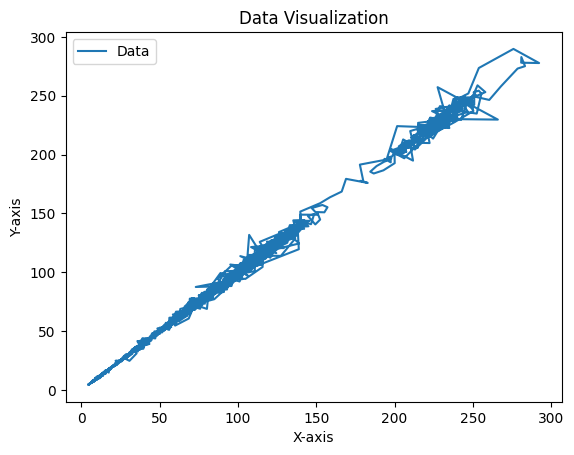

In [4]:
# Create a line plot of the data
plt.plot(df['Open'], df['Close'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

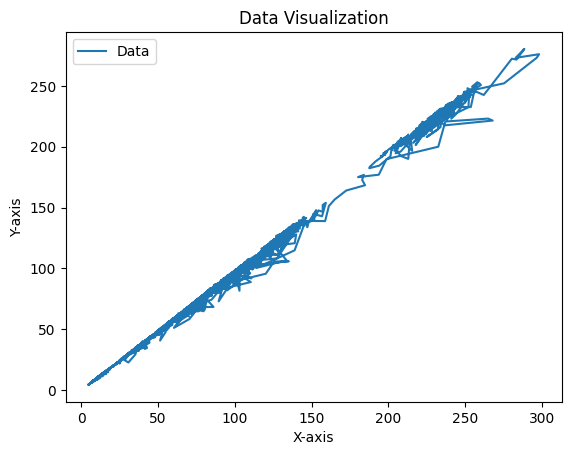

In [5]:
# Create a line plot of the data
plt.plot(df['High'], df['Low'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [6]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0


In [7]:
# Feature engineering: add technical indicators
df.loc[:, 'MA_7'] = df['Close'].rolling(window=7).mean()
df.loc[:,'MA_14'] = df['Close'].rolling(window=14).mean()
df.loc[:,'MA_21'] = df['Close'].rolling(window=21).mean()
df.loc[:,'EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df.loc[:,'EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df.loc[:,'EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()

In [8]:
# Split the data into training, validation, and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)


In [9]:
# Create the feature matrix X and the target vector y for each set
X_train = train[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_train = train['Close']
X_val = val[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_val = val['Close']
X_test = test[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_test = test['Close']


In [10]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Open'] = scaler.fit_transform(df[['Open']])
df['High'] = scaler.fit_transform(df[['High']])
df['Low'] = scaler.fit_transform(df[['Low']])
df['Close'] = scaler.fit_transform(df[['Close']])

In [11]:
# Assuming you have a DataFrame df with columns for features (X) and target variable (y)
X = df.drop('Volume', axis=1)  # Assign the feature columns to X
y = df['Volume']  # Assign the 'Volume' column to y
# Drop rows with missing values from X and update y accordingly
X = X.dropna()
y = y.loc[X.index]

In [12]:
# Find rows with NaN values in y_train
nan_indices = np.isnan(y_train)

# Remove rows with NaN values from X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

In [13]:
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1))


In [14]:
# Create an instance of HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

# Fit the model
model.fit(X_train, y_train)

C:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor()

In [15]:
# Create an imputer with a chosen strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform X_train
X_train = imputer.fit_transform(X_train)

In [16]:
# Convert X_train to a DataFrame
X_train = pd.DataFrame(X_train)

# Drop samples with missing values from X_train
X_train = X_train.dropna()

In [17]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

C:\Users\sai\AppData\Local\Temp\ipykernel_7624\51474837.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [18]:
# Convert X_val to a DataFrame if it's a numpy array
X_val = pd.DataFrame(X_val)

# Drop samples with missing values
X_val = X_val.dropna()

# Convert X_val back to a numpy array if desired
X_val = X_val.values

In [19]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Create an imputer transformer for X
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_val_imputed = imputer_X.transform(X_val)

# Reshape y_train and y_val to have two dimensions
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_val_reshaped = np.array(y_val).reshape(-1, 1)

# Create an imputer transformer for y
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train_reshaped)
y_val_imputed = imputer_y.transform(y_val_reshaped)

# Create a pipeline with the imputers and the model
pipeline = Pipeline(steps=[('imputer_X', imputer_X), ('imputer_y', imputer_y), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train_imputed, y_train_imputed)

# Predict the target values for validation set
y_val_pred = pipeline.predict(X_val_imputed)

# Check if the arrays have the same length
if not np.array_equal(y_val_imputed.shape, y_val_pred.shape):
    # Resize the array with the smaller length to match the length of the array with the larger length
    y_val_pred = np.resize(y_val_pred, y_val_imputed.shape)

# Calculate the mean squared error
mse = mean_squared_error(y_val_imputed, y_val_pred)

print('Mean Squared Error on Validation Set:', mse)


C:\Users\sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Mean Squared Error on Validation Set: 5724.937766248707


In [27]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Create an imputer transformer for X
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_val_imputed = imputer_X.transform(X_val)

# Reshape y_train and y_val to have two dimensions
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_val_reshaped = np.array(y_val).reshape(-1, 1)

# Create an imputer transformer for y
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train_reshaped)
y_val_imputed = imputer_y.transform(y_val_reshaped)

# Create a pipeline with the imputers and the model
pipeline = Pipeline(steps=[('imputer_X', imputer_X), ('imputer_y', imputer_y), ('model', model)])

# Fit the pipeline on the training data
pipeline.fit(X_train_imputed, y_train_imputed)

# Predict the target values for validation set
y_val_pred = pipeline.predict(X_val_imputed)

# Resize y_val to match the length of y_val_pred
y_val_resized = np.resize(y_val_imputed, y_val_pred.shape)

# Calculate the mean squared error
mse = mean_squared_error(y_val_resized, y_val_pred)

print('Mean Squared Error on Validation Set:', mse)


Mean Squared Error on Validation Set: 5729.223360980038


C:\Users\sai\AppData\Local\Temp\ipykernel_7624\616413687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


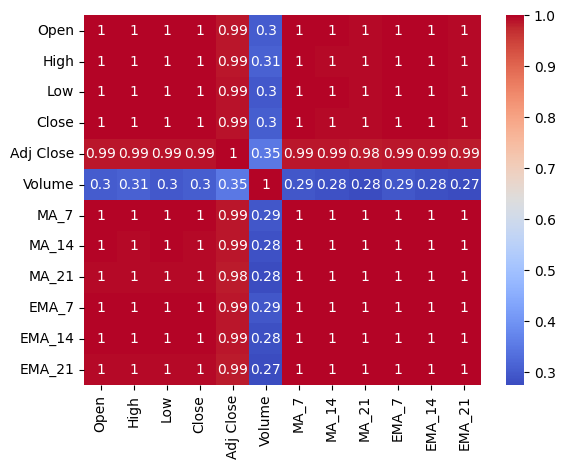

In [30]:

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [31]:
# Save the model to a file
import joblib
joblib.dump(model, 'stock_model.joblib')

['stock_model.joblib']

In [36]:
# Load the model
model = joblib.load('stock_model.joblib')

# Predict the close price for the new data
X_new = [[0.5, 0.6, 0.4, 0.7, 0.8, 0.9, 0.2, 0.3, 0.1]]  # Adjust the number of features to 9
y_new_pred = model.predict(X_new)

print('Predicted Close Price:', y_new_pred)


Predicted Close Price: [[0.27935543]]
